In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
from matplotlib import colors
from matplotlib import ticker
from scipy import stats

sns.set(rc={'figure.figsize':(8,3.5), 'figure.autolayout': True})
sns.set_style("whitegrid")
data_path = os.path.join(os.path.pardir, 'data', 'daint_utilization')


In [2]:
dfs = []
for i in range(36):
    dfs.append(pd.read_csv(os.path.join(data_path, f'out_{i}.csv')))
df = pd.concat(dfs)

from dateutil.parser import parse
df['date'] = df.date.apply(parse)
df['idle_cpus'] *= 100
df['partially_idle_cpus'] *= 100
df['partially_free_mem'] *= 100
df['free_mem'] *= 100
df['total_free_mem'] = df['partially_free_mem'] + df['free_mem']
df['total_idle_cpus'] = df['idle_cpus'] #+ df['partially_idle_cpus']
df.sort_values(by=['date'],inplace=True)
df.reset_index(inplace=True)

/home/mcopik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


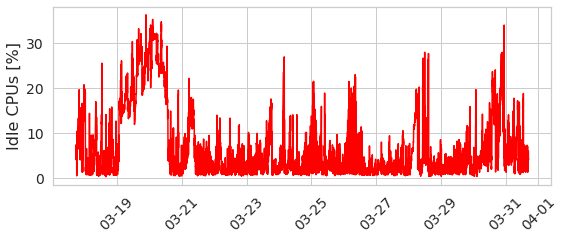

In [23]:

fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

plot = sns.lineplot('date', 'idle_cpus', color='red', data=df, ax=ax1)

ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)


ax1.set_ylabel('Idle CPUs [%]',fontsize=16)
ax1.set_xlabel('')#'Time',fontsize=16)
#ax2.set_ylabel('Free Memory [%]',fontsize=16)
#plt.set_title('Piz Daint utilization rates: idle CPU cores.\n Data from 31.03 to 7.04 in 2021.',fontsize=16)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.',fontsize=16)
# Major ticks every 6 months.
#fmt_half_year = mdates.HourLocator(interval=1)
#ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
#fmt_month = mdates.MinuteLocator()
#ax.xaxis.set_minor_locator(fmt_month)
#xfmt = md.DateFormatter('%d-%m-%Y %H:%M:%S')
#ax.xaxis.set_major_formatter(xfmt)

# Text in the x axis will be displayed in 'YYYY-mm' format.
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
#xformatter = md.DateFormatter('%d-%m-%Y %H:%M:%S')

## Set xtick labels to appear every 240 minutes

xfmt = md.DateFormatter('%m-%d')
ax1.xaxis.set_major_formatter(xfmt)


plot.figure.savefig(os.path.join('plots', 'cpu_utilization_daint.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)

/home/mcopik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mcopik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mcopik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


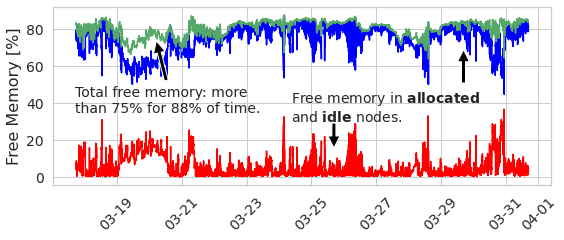

In [125]:
sns.set(rc={'figure.figsize':(8,3.5), 'figure.autolayout': True})


fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

plot = sns.lineplot('date', 'free_mem', color='red', data=df, ax=ax1)
sns.lineplot('date', 'partially_free_mem', color='blue', data=df, ax=ax1)
sns.lineplot('date', 'total_free_mem', color='g', data=df, ax=ax1)

ax1.set_xlabel('')#'Time',fontsize=16)
ax1.set_ylabel('Free Memory [%]',fontsize=16)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.', fontsize=16)
ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
#ax1.set_ylim([0,100])

xfmt = md.DateFormatter('%m-%d')
ax1.xaxis.set_major_formatter(xfmt)
#print(dt.datetime(2022, 3, 19))
#print(df.dtypes)
#plt.annotate('Idle nodes.', xy=(np.datetime64('2022-03-30 16:44:16'), 20),  #xycoords='data',
#            xytext=(np.datetime64('2022-03-27 22:44:16'), 40), fontsize=14,
    #textcoords='axes fraction',
#            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
#    #        , verticalalignment='top',
#)
#plt.annotate('Allocated nodes.', xy=(np.datetime64('2022-03-25 16:44:16'), 70),  #xycoords='data',
#            xytext=(np.datetime64('2022-03-24 12:44:16'), 30), fontsize=14,
    #textcoords='axes fraction',
#            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
#)
plot.annotate('Total free memory: more\nthan 75% for 88% of time.', xy=(np.datetime64('2022-03-20 04:44:16'), 75),  #xycoords='data',
            xytext=(np.datetime64('2022-03-17 16:44:16'), 35), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plot.annotate(r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(np.datetime64('2022-03-29 16:44:16'), 70),  #xycoords='data',
            xytext=(np.datetime64('2022-03-24 08:44:16'), 30), fontsize=14,
    #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plot.annotate("",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(np.datetime64('2022-03-29 16:44:16'), 70),  #xycoords='data',
            xytext=(np.datetime64('2022-03-29 16:44:16'), 50), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plot.annotate("",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(np.datetime64('2022-03-25 16:44:16'), 15),  #xycoords='data',
            xytext=(np.datetime64('2022-03-25 16:44:16'), 30), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)

plot.figure.savefig(os.path.join('plots', 'mem_utilization_daint.pdf'), bbox_inches='tight',pad_inches = 0, transparent=False)

In [14]:
subset = df.loc[df['total_free_mem'] > 75]
print(df['total_free_mem'].min())
print(df['total_free_mem'].quantile(.75))
print(subset.shape[0], df.shape[0], subset.shape[0] /df.shape[0])

64.09011056547783
83.7358926042681
10261 11624 0.8827426015141088


In [15]:

print(df['total_idle_cpus'].min())
print(df['total_idle_cpus'].max())
print(df['total_idle_cpus'].mean())
print(df['total_idle_cpus'].median())
print(df['total_idle_cpus'].quantile(.95))
for i in [5,10,15,20,25]:
    subset = df.loc[df['total_idle_cpus'] > i]
    print(i, subset.shape[0], df.shape[0], subset.shape[0] /df.shape[0])

0.23317112733171
36.27022598484331
6.6460580977028485
3.45525429964254
24.170597493364703
5 4369 11624 0.3758602890571232
10 2501 11624 0.21515829318651067
15 1686 11624 0.1450447350309704
20 1011 11624 0.08697522367515485
25 517 11624 0.0444769442532691


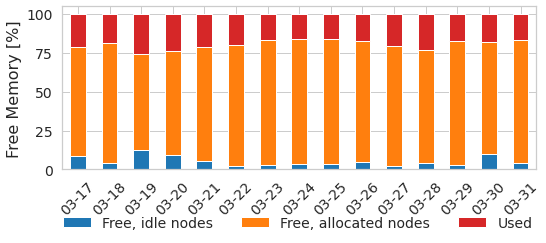

In [159]:
import datetime

sns.set(rc={'figure.figsize':(8.5,3), 'figure.autolayout': False})
sns.set_style("whitegrid")

aggregated_data_daily = df.resample('D', on='date').mean().reset_index()

aggregated_data_daily['date'] = aggregated_data_daily.date.dt.strftime('%m-%d')
aggregated_data_daily['allocated_mem'] = 100 - aggregated_data_daily['total_free_mem']
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

#plot = sns.lineplot('date', 'free_mem', color='red', data=df, ax=ax1)
#sns.lineplot('date', 'partially_free_mem', color='blue', data=df, ax=ax1)
#sns.lineplot('date', 'total_free_mem', color='g', data=df, ax=ax1)

colormap=list(map(colors.to_rgba, ['tab:blue', 'tab:orange', 'tab:red']))
aggregated_data_daily.plot(
    kind='bar',
    x='date',
    y=['free_mem', 'partially_free_mem', 'allocated_mem'],
    color=colormap,
    stacked=True,
    ax=ax1
)
plot = fig

ax1.set_xlabel('')#'Time',fontsize=16)
ax1.set_ylabel('Free Memory [%]',fontsize=16)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.', fontsize=16)
ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
#ax1.set_ylim([0,100])

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    handles,
    ['Free, idle nodes', 'Free, allocated nodes', 'Used'],
    fontsize=14,
    ncol=3,
    bbox_to_anchor=(-0.025, -0.45),
    loc="lower left",
    frameon=False
)

#xfmt = md.DateFormatter('%m-%d')
#ax1.xaxis.set_major_formatter(xfmt)

plot.figure.savefig(
    os.path.join('plots', 'mem_utilization_daint_barplot.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

# Node Idleness Statistics

In [4]:
utilization_stats = pd.read_csv(os.path.join(data_path, 'results', f'out.csv'))
# drop the 'already idle'
utilization_stats.drop(utilization_stats[utilization_stats.prev_query_len <= 0].index, inplace=True, axis=0)
# drop the 'still idle' - we can't accurately estimate them
utilization_stats.drop(utilization_stats[utilization_stats.next_query_len <= 0].index, inplace=True, axis=0)

for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats.loc[utilization_stats['duration_idle'] < time].shape[0] / utilization_stats.shape[0])

utilization_stats2 = utilization_stats.copy(deep=True)

utilization_stats['type'] = 'min'

utilization_stats2['duration_idle'] += utilization_stats2.prev_query_len + utilization_stats2.next_query_len
utilization_stats2['type'] = 'max'
for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats2.loc[utilization_stats2['duration_idle'] < time].shape[0] / utilization_stats2.shape[0])

utilization_stats = pd.concat([utilization_stats, utilization_stats2], axis=0)


Idle time 300, fraction  0.6194114932948338
Idle time 600, fraction  0.7985235238959918
Idle time 1200, fraction  0.9010909848631432
Idle time 1800, fraction  0.938590798815247
Idle time 6000, fraction  0.9834089928111093
Idle time 300, fraction  0.30372691145608527
Idle time 600, fraction  0.6953592212779258
Idle time 1200, fraction  0.8784794677541786
Idle time 1800, fraction  0.9281765817792133
Idle time 6000, fraction  0.9817970738386891


1000.0
0.9333836902972301
0.7469413725869588


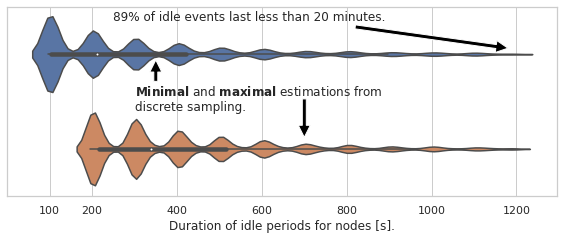

In [5]:

#print(utilization_stats)
#df = pd.concat(dfs)sns.set_style("whitegrid")
fig = plt.figure(figsize=(8,3.5))
ax = fig.gca()
#ax2 = ax1.twinx()

print(1e3)
print(utilization_stats.loc[utilization_stats['duration_idle'] < 1800].shape[0] / utilization_stats.shape[0])
print(utilization_stats.loc[utilization_stats['duration_idle'] < 600].shape[0] / utilization_stats.shape[0])

sns.violinplot(
    data=utilization_stats.loc[
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
    ],
    x='duration_idle',
    y='type',
    ax=ax
)
#ax1.set_yticks()
#sns.violinplot(
#    data=utilization_stats.loc[
#        (utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1800)
#    ],
#    x='duration_idle',
#    ax=ax1
#)
#ax1.set_xscale('log')
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Duration of idle periods for nodes [s].')

ax.set_xticks([100, 200, 400, 600, 800, 1000, 1200])
#ax.set_yticks(['Min', 'Max'])

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

#plot = sns.lineplot('date', 'idle_cpus', color='red', data=df, ax=ax1)

# ~100 seconds is sampling interval
#80% and 70% nodes are idle for less than 10 minutes
#We present 93.5% percent of data - nodes idle for less than 30 minutes (1800 seconds).

ax.annotate(
    r'$\bf{Minimal}$ and $\bf{maximal}$ estimations from' + '\ndiscrete sampling.',
    xy=(300, 1),
    xytext=(300, 0.6),
    fontsize=12,
)
ax.annotate(
    '',
    xy=(350, 0.05),
    xytext=(350, 0.3),
    fontsize=12,
    #textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05)
    #,horizontalalignment='right'
)
ax.annotate(
    '',
    xy=(700, 0.9),
    xytext=(700, 0.45),
    fontsize=12,
    #textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05)
    #,horizontalalignment='right'
)

ax.annotate(
    '89% of idle events last less than 20 minutes.',
    xy=(250, -0.35),
    xytext=(250, -0.35),
    fontsize=12,
)
ax.annotate(
    '',
    xy=(1200, -0.05),
    xytext=(800, -0.3),
    fontsize=12,
    arrowprops=dict(facecolor='black', shrink=0.05)
)


ax.figure.savefig(
    os.path.join('plots', 'nodes_idle_statistics.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

# Poster plots

1000.0
0.9333836902972301
0.8897852263086609


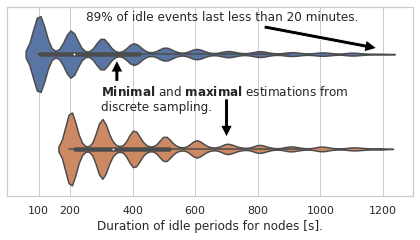

In [6]:

#print(utilization_stats)
#df = pd.concat(dfs)sns.set_style("whitegrid")
fig = plt.figure(figsize=(6, 3.5))
ax = fig.gca()
#ax2 = ax1.twinx()

print(1e3)
print(utilization_stats.loc[utilization_stats['duration_idle'] < 1800].shape[0] / utilization_stats.shape[0])
print(utilization_stats.loc[utilization_stats['duration_idle'] < 1200].shape[0] / utilization_stats.shape[0])

sns.violinplot(
    data=utilization_stats.loc[
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
    ],
    x='duration_idle',
    y='type',
    ax=ax
)
#ax1.set_yticks()
#sns.violinplot(
#    data=utilization_stats.loc[
#        (utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1800)
#    ],
#    x='duration_idle',
#    ax=ax1
#)
#ax1.set_xscale('log')
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Duration of idle periods for nodes [s].')

ax.set_xticks([100, 200, 400, 600, 800, 1000, 1200])
#ax.set_yticks(['Min', 'Max'])

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

#plot = sns.lineplot('date', 'idle_cpus', color='red', data=df, ax=ax1)

# ~100 seconds is sampling interval
#80% and 70% nodes are idle for less than 10 minutes
#We present 93.5% percent of data - nodes idle for less than 30 minutes (1800 seconds).

ax.annotate(
    r'$\bf{Minimal}$ and $\bf{maximal}$ estimations from' + '\ndiscrete sampling.',
    xy=(300, 1),
    xytext=(300, 0.6),
    fontsize=12,
)
ax.annotate(
    '',
    xy=(350, 0.05),
    xytext=(350, 0.3),
    fontsize=12,
    #textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05)
    #,horizontalalignment='right'
)
ax.annotate(
    '',
    xy=(700, 0.9),
    xytext=(700, 0.45),
    fontsize=12,
    #textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05)
    #,horizontalalignment='right'
)

ax.annotate(
    '89% of idle events last less than 20 minutes.',
    xy=(250, -0.35),
    xytext=(250, -0.35),
    fontsize=12,
)
ax.annotate(
    '',
    xy=(1200, -0.05),
    xytext=(800, -0.3),
    fontsize=12,
    arrowprops=dict(facecolor='black', shrink=0.05)
)

ax.figure.savefig(
    os.path.join('plots', 'nodes_idle_statistics_poster.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

/home/mcopik/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


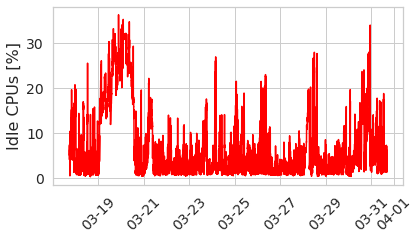

In [7]:

fig = plt.figure(figsize=(6, 3.5))
ax = fig.gca()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

plot = sns.lineplot('date', 'idle_cpus', color='red', data=df, ax=ax)

ax.tick_params(axis='x', rotation=45, labelsize=14)
ax.tick_params(axis='y', labelsize=14)


ax.set_ylabel('Idle CPUs [%]',fontsize=16)
ax.set_xlabel('')#'Time',fontsize=16)
#ax2.set_ylabel('Free Memory [%]',fontsize=16)
#plt.set_title('Piz Daint utilization rates: idle CPU cores.\n Data from 31.03 to 7.04 in 2021.',fontsize=16)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.',fontsize=16)
# Major ticks every 6 months.
#fmt_half_year = mdates.HourLocator(interval=1)
#ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
#fmt_month = mdates.MinuteLocator()
#ax.xaxis.set_minor_locator(fmt_month)
#xfmt = md.DateFormatter('%d-%m-%Y %H:%M:%S')
#ax.xaxis.set_major_formatter(xfmt)

# Text in the x axis will be displayed in 'YYYY-mm' format.
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
#xformatter = md.DateFormatter('%d-%m-%Y %H:%M:%S')

## Set xtick labels to appear every 240 minutes

xfmt = md.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(xfmt)


plot.figure.savefig(os.path.join('plots', 'cpu_utilization_daint_poster.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)